<a href="https://colab.research.google.com/github/nithin77777/nithin77777/blob/main/Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [2]:
os.chdir('/content/drive/MyDrive/Project_Recommendation_Systems/Data Set')


## 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

### 1a) A. Merge all the provided CSVs into one data-frame. 

In [3]:
files = os.listdir('/content/drive/MyDrive/Project_Recommendation_Systems/Data Set')
files

['phone_user_review_file_1.csv',
 'phone_user_review_file_2.csv',
 'phone_user_review_file_3.csv',
 'phone_user_review_file_4.csv',
 'phone_user_review_file_5.csv',
 'phone_user_review_file_6.csv']

In [4]:
df1 = pd.read_csv('phone_user_review_file_1.csv',encoding='latin-1')
df2 = pd.read_csv('phone_user_review_file_2.csv',encoding='latin-1')
df3 = pd.read_csv('phone_user_review_file_3.csv',encoding='latin-1')
df4 = pd.read_csv('phone_user_review_file_4.csv',encoding='latin-1')
df5 = pd.read_csv('phone_user_review_file_5.csv',encoding='latin-1')
df6 = pd.read_csv('phone_user_review_file_6.csv',encoding='latin-1')

In [5]:
Dataframes_merge = [df1, df2, df3, df4, df5, df6]

In [6]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [7]:
df = pd.concat(Dataframes_merge, join='outer')

In [8]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [9]:
df.shape

(1415133, 11)

In [10]:
(df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0] + df6.shape[0]) == df.shape[0]

True

Therefore, we can say that all the csv files are merged through pd.concat method, which is verified through pd.DataFrame.shape function that returned True

### 1b) Explore, understand the Data and share at least 2 observations

The Dataframe "df" is the merged dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [12]:
df.shape

(1415133, 11)

1. From the shape of the data we can say that the dataframe has 1415133 records/rows in each feature. <br>
2. The features 'score', 'score_max' have 1351644 records of data which are non-null which says that, there may be 63489 records data that includes null values, as the data type is float64. <br>
3. The features 'extract', 'author', 'product' also have unexpected/missing values as they contain records less than 1415133 and the datatype of all the three is 'object' type. <br>


In [13]:
df.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


The standard deviation for score_max feature is 0.0, which means there can be no proper distribution of data. And the mean, median and the mode of the feature lie on the same line. <br>


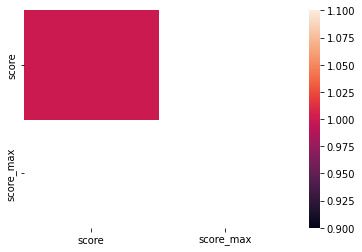

In [14]:
sns.heatmap(df.corr())

Even the correlation of the data is not proper. The score is showing correlation with itself.

### 1c) Round off scores to the nearest integers.

In [15]:
df['score']

0         10.0
1         10.0
2          6.0
3          9.2
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64

In [16]:
df['score'] = df['score'].fillna(df['score'].mean()).astype(int)
  


In [17]:
for i in df['score']:
  i = round(i)
  

In [18]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [19]:
df.score

0         10
1         10
2          6
3          9
4          4
          ..
163832     2
163833    10
163834     2
163835     8
163836     2
Name: score, Length: 1415133, dtype: int64

we can see that above the data type of the feature df.score has been changed from float64 to int64

Therefore we can see that in the above dataframe the feature score has no decimals beside it and all the records are converted into integers

### 1d) Check for missing values. Impute the missing values, if any

In [20]:
df.replace(to_replace=' ', value=np.nan, inplace=True)

In [21]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

#### Imputing: 
1. Imputing the nan values of df.score_max with mean. <br>
2. Imputing the values of df.extract with mode. <br>
3. Imputing the values of df.author with mode. <br>
4. Imputing the values of df.product with mode.

In [22]:
df['score_max'].fillna(df['score_max'].mean(), inplace=True)

In [23]:
df['extract'].fillna(df['extract'].mode()[0], inplace=True)

In [24]:
df['author'].fillna(df['author'].mode()[0], inplace=True)

In [25]:
df['product'].fillna(df['product'].mode()[0], inplace=True)

In [26]:
df.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1415133 non-null  int64  
 7   score_max  1415133 non-null  float64
 8   extract    1415133 non-null  object 
 9   author     1415133 non-null  object 
 10  product    1415133 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 129.6+ MB


Therefore, we can observe that all the null values are imputed. As there are no missing records from df.info() and df.isna().sum()

### 1e) Check for duplicate values and remove them, if any

In [28]:
df.duplicated().sum()

6430

We can observe from the output that there are 6430 duplicate values in the dataframe. <br>

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

Therefore all the duplicate values are removed using drop_duplicates(inplace=True) . <br>
As we can see that there are 0 duplicate values after dropping the duplicate values from the dataframe.

### 1f) Keep only 1 Million data samples. Use random state=612

In [31]:
df = df.sample(n=1000000, random_state=612)

In [32]:
df.shape

(1000000, 11)

Therefore, the dataframe has been sampled to ! million, with a random state of 612. <br>

### 1g) Drop irrelevant features. Keep features like Author, Product, and Score.

In [33]:
df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [34]:
drop_cols = ['phone_url', 'date', 'lang', 'country', 'source', 'domain','score_max', 'extract']

In [35]:
df.drop(columns=drop_cols, inplace=True)

In [36]:
df.head()

,score,author,product
100431,10,cat19y,Samsung Galaxy Ace GT-S5830
15887,8,dazzer86,Sony Xperia S
54918,10,Martin,Apple iPhone 7 128GB Black
17943,2,Amazon Customer,Samsung Galaxy Ace 2 I8160 4GB White WiFi Andr...
153696,8,WOLSWIJK,Sony Xperia X Compact zwart / 32 GB


In [37]:
df.shape

(1000000, 3)

Therefore, all the irrelevant features have been dropped. <br>
Now, the dataframe 'df' consists of only 3 features. <br>

# Question 2

### 2a) Identify the most rated features

In [76]:
df_grouped = pd.DataFrame(df['score'].groupby(df['product']).mean())

In [77]:
df_grouped

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.000000
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.000000
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.290323
...,...
æ©æç½æ L7,10.000000
è¯ºåºäº 7500Prism,8.000000
è¯ºåºäº N73,10.000000
